# Solving the heat equation with full space-time FEM on a moving domain

## Uniform mesh and moving domain

Solving linear variational problem.


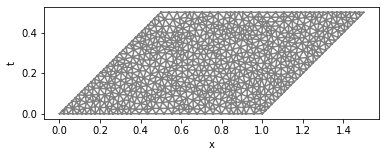

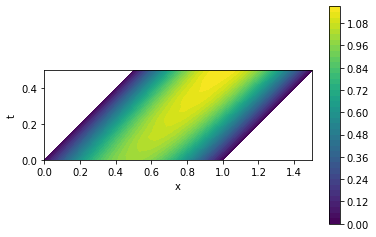

In [1]:
import dolfin
from fenics import *
import matplotlib.pyplot as plt
import math

# load space-time mesh
mesh = Mesh("polygon_mesh.xml")

V = FunctionSpace(mesh, 'P', 1)

# Analytical solution U is used as Dirichlet BC for x ∈ ∂Ω or t = t0
U = Expression('sin(pi*(x[0]-x[1]))*(1.+x[1])*exp(-0.5*x[1])', degree=3, pi=math.pi)
bc = DirichletBC(V, U, lambda x, on_boundary: (near(x[0], x[1]) or near(x[0], 1.+x[1]) or near(x[1], 0.)) and on_boundary)

# Define variational problem
f = Expression("(-pow(pi, 2)*(x[1] + 1)*sin(pi*(x[1] - x[0])) + (1.0/2.0)*(x[1] + 1)*sin(pi*(x[1] - x[0])) - pi*(x[1] + 1)*cos(pi*(x[1] - x[0])) - sin(pi*(x[1] - x[0])))*exp(-1.0/2.0*x[1])", degree=4, pi=math.pi)
u = TrialFunction(V)
v = TestFunction(V)
a = grad(u)[1]*v*dx + grad(u)[0]*grad(v)[0]*dx
L = f*v*dx

# Solve
u_h = Function(V)
solve(a == L, u_h, bcs=bc)

# Plot solution
plot(mesh) # Moving mesh
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Moving_mesh.svg")
c = plot(u_h) # Solution on moving mesh
plt.colorbar(c)
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Moving_solution.svg")